# __Data Transformation with dplyr__

In [1]:
# packages
library(nycflights13)
library(tidyverse)

# conf
repr_html.tbl_df <- function(obj, ..., rows = 6) repr:::repr_html.data.frame(obj, ..., rows = rows)
options(dplyr.summarise.inform = FALSE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


## __Filter Rows with filter()__

filter() allows you to subset observations based on their values.
The first argument is the name of the data frame. The second and
subsequent arguments are the expressions that filter the data frame.
For example, we can select all flights on January 1st with:

In [3]:
flights %>%
    filter(month == 1, day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00


## Logical Operators
Multiple arguments to filter() are combined with “and”: every
expression must be true in order for a row to be included in the out‐
put. For other types of combinations, you’ll need to use Boolean
operators yourself: & is “and,” | is “or,” and ! is “not.”

In [4]:
nov_dec_1 <- flights %>%
    filter(month == 11 | month == 12)

In [5]:
nov_dec_2 <- flights %>%
    filter(month %in% c(11, 12))

In [6]:
all_equal(nov_dec_1, nov_dec_2)

[1] TRUE

Sometimes you can simplify complicated subsetting by remember‐
ing De Morgan’s law: !(x & y) is the same as !x | !y , and !(x |
y) is the same as !x & !y . For example, if you wanted to find flights
that weren’t delayed (on arrival or departure) by more than two
hours, you could use either of the following two filters:

In [7]:
twoh_del <- flights %>%
    filter(!(arr_delay > 120 | dep_delay > 120))

In [8]:
twoh_del_2 <- flights %>%
    filter(arr_delay <= 120, dep_delay <= 120)

In [9]:
all_equal(twoh_del, twoh_del_2)

[1] TRUE

In [10]:
# find all flights that
# a. Had an arrival delay of two or more hours
flights %>%
    filter(arr_delay >= 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,2053,1815,158,2310,2054,136,EV,5292,N600QX,EWR,ATL,91,746,18,15,2013-09-30 18:00:00
2013,9,30,2159,1845,194,2344,2030,194,9E,3320,N906XJ,JFK,BUF,50,301,18,45,2013-09-30 18:00:00
2013,9,30,2235,2001,154,59,2249,130,B6,1083,N804JB,JFK,MCO,123,944,20,1,2013-09-30 20:00:00


In [11]:
# find all flights that
# b. Flew to Houston ( IAH or HOU )
flights %>%
    filter(dest %in% c('IAH', 'HOU'))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,1859,1859,0,2134,2159,-25,UA,1128,N14731,LGA,IAH,180,1416,18,59,2013-09-30 18:00:00
2013,9,30,2015,2015,0,2244,2307,-23,UA,1545,N17730,EWR,IAH,174,1400,20,15,2013-09-30 20:00:00
2013,9,30,2105,2106,-1,2329,2354,-25,UA,475,N477UA,EWR,IAH,175,1400,21,6,2013-09-30 21:00:00


In [12]:
# find all flights that
# c. Were operated by United, American, or Delta
flights %>%
    filter(carrier %in% c('UA', 'AA', 'DL'))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,2140,2140,0,10,40,-30,AA,185,N335AA,JFK,LAX,298,2475,21,40,2013-09-30 21:00:00
2013,9,30,2149,2156,-7,2245,2308,-23,UA,523,N813UA,EWR,BOS,37,200,21,56,2013-09-30 21:00:00
2013,9,30,2233,2113,80,112,30,42,UA,471,N578UA,EWR,SFO,318,2565,21,13,2013-09-30 21:00:00


In [13]:
# find all flights that
# d. Departed in summer (July, August, and September)flights %>%
flights %>%
    filter(month %in% c(7, 8, 9))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


In [14]:
# find all flights that
# e. Arrived more than two hours late, but didn’t leave late
flights %>%
    filter(arr_delay > 120 & dep_delay <= 0)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,27,1419,1420,-1,1754,1550,124,MQ,3728,N1EAMQ,EWR,ORD,135,719,14,20,2013-01-27 14:00:00
2013,10,7,1350,1350,0,1736,1526,130,EV,5181,N611QX,LGA,MSN,117,812,13,50,2013-10-07 13:00:00
2013,10,7,1357,1359,-2,1858,1654,124,AA,1151,N3CMAA,LGA,DFW,192,1389,13,59,2013-10-07 13:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,8,13,657,659,-2,1015,814,121,EV,4522,N14188,EWR,BNA,146,748,6,59,2013-08-13 06:00:00
2013,8,28,1157,1200,-3,1520,1316,124,US,2179,N737US,LGA,DCA,63,214,12,0,2013-08-28 12:00:00
2013,9,19,656,700,-4,1037,833,124,UA,331,N808UA,LGA,ORD,192,733,7,0,2013-09-19 07:00:00


In [15]:
# find all flights that
# f. Were delayed by at least an hour, but made up over 30
# minutes in flight
flights %>%
    filter(dep_delay >= 60 & air_time > 30)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,826,715,71,1136,1045,51,AA,443,N3GVAA,JFK,MIA,160,1089,7,15,2013-01-01 07:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,2211,2059,72,2339,2242,57,EV,4672,N12145,EWR,STL,120,872,20,59,2013-09-30 20:00:00
2013,9,30,2233,2113,80,112,30,42,UA,471,N578UA,EWR,SFO,318,2565,21,13,2013-09-30 21:00:00
2013,9,30,2235,2001,154,59,2249,130,B6,1083,N804JB,JFK,MCO,123,944,20,1,2013-09-30 20:00:00


In [16]:
# find all flights that
# g. Departed between midnight and 6 a.m. (inclusive)
flights %>%
    filter(dep_time <= 600 | dep_time == 2400)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,558,600,-2,742,749,-7,DL,731,N337NB,LGA,DTW,83,502,6,0,2013-09-30 06:00:00
2013,9,30,559,600,-1,NA,715,NA,WN,464,N411WN,EWR,MDW,NA,711,6,0,2013-09-30 06:00:00
2013,9,30,600,600,0,844,856,-12,B6,601,N588JB,JFK,FLL,139,1069,6,0,2013-09-30 06:00:00


## __Arrange Rows with arrange()__

In [17]:
arrange(flights, year, month, day)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,12,31,NA,1615,NA,NA,1800,NA,MQ,3301,N844MQ,LGA,RDU,NA,431,16,15,2013-12-31 16:00:00
2013,12,31,NA,600,NA,NA,735,NA,UA,219,NA,EWR,ORD,NA,719,6,0,2013-12-31 06:00:00
2013,12,31,NA,830,NA,NA,1154,NA,UA,443,NA,JFK,LAX,NA,2475,8,30,2013-12-31 08:00:00


Use desc() to reorder by a column in descending order:

In [18]:
arrange(flights, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


## __Select Columns with select()__

It’s not uncommon to get datasets with hundreds or even thousands
of variables. In this case, the first challenge is often narrowing in on
the variables you’re actually interested in. select() allows you to
rapidly zoom in on a useful subset using operations based on the
names of the variables.

In [19]:
# select cols by name
select(flights, year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
⋮,⋮,⋮
2013,9,30
2013,9,30
2013,9,30


In [20]:
# select all cols between year and day
select(flights, year:day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
⋮,⋮,⋮
2013,9,30
2013,9,30
2013,9,30


In [21]:
# select all columns except those from year to day (inclusive)
select(flights, -(year:day))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


In [22]:
# select cols that contain delay data
select(flights, contains('delay'))

dep_delay,arr_delay
<dbl>,<dbl>
2,11
4,20
2,33
⋮,⋮
NA,NA
NA,NA
NA,NA


In [23]:
# select cols end with time
select(flights, ends_with('time'))

dep_time,sched_dep_time,arr_time,sched_arr_time,air_time
<int>,<int>,<int>,<int>,<dbl>
517,515,830,819,227
533,529,850,830,227
542,540,923,850,160
⋮,⋮,⋮,⋮,⋮
NA,1210,NA,1330,NA
NA,1159,NA,1344,NA
NA,840,NA,1020,NA


select() can be used to rename variables, but it’s rarely useful
because it drops all of the variables not explicitly mentioned.
Instead, use rename() , which is a variant of select() that keeps all
the variables that aren’t explicitly mentioned:

In [24]:
rename(flights, tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


Another option is to use select() in conjunction with the every
thing() helper. This is useful if you have a handful of variables
you’d like to move to the start of the data frame:

In [25]:
select(flights, time_hour, air_time, everything())

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013-09-30 12:00:00,NA,2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,764,12,10
2013-09-30 11:00:00,NA,2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,419,11,59
2013-09-30 08:00:00,NA,2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,431,8,40


In [26]:
# What does the one_of() function do? Why might it be helpful
# in conjunction with this vector?
vars <- c(
    'year', 'month', 'day', 'dep_delay', 'arr_delay'
)

# In the most recent versions of dplyr, one_of has been deprecated in
# favor of two functions: all_of() and any_of().
# These functions behave similarly if all variables are present in the data frame.
# These functions differ in their strictness. The function all_of() will
# raise an error if one of the variable names is not present, while any_of() will ignore it.
select(flights, all_of(vars))

year,month,day,dep_delay,arr_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,NA
2013,9,30,NA,NA
2013,9,30,NA,NA


## __Add new variables with mutate()__

`mutate()` always adds new columns at the end of your dataset so
we’ll start by creating a narrower dataset so we can see the new variables.

In [27]:
flights_sml <- flights %>%
    select(year:day, ends_with('delay'), distance, air_time)

In [28]:
flights_sml %>%
    mutate(gain = arr_delay - dep_delay,
           speed = distance / air_time * 60)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731
2013,1,1,2,33,1089,160,31,408.3750
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,NA,764,NA,NA,NA
2013,9,30,NA,NA,419,NA,NA,NA
2013,9,30,NA,NA,431,NA,NA,NA


In [29]:
# Note that you can refer to columns that you’ve just created:
flights_sml %>%
    mutate(gain = arr_delay - dep_delay,
           hours = air_time / 60,
           gain_per_hour = gain / hours)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,2,11,1400,227,9,3.783333,2.378855
2013,1,1,4,20,1416,227,16,3.783333,4.229075
2013,1,1,2,33,1089,160,31,2.666667,11.625000
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,NA,764,NA,NA,NA,NA
2013,9,30,NA,NA,419,NA,NA,NA,NA
2013,9,30,NA,NA,431,NA,NA,NA,NA


If you only want to keep the new variables, use `transmute()` :

In [30]:
flights %>%
    transmute(gain = arr_delay - dep_delay,
              hours = air_time / 60,
              gain_per_hour = gain / hours)

gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>
9,3.783333,2.378855
16,3.783333,4.229075
31,2.666667,11.625000
⋮,⋮,⋮
NA,NA,NA
NA,NA,NA
NA,NA,NA


### Useful Creation Functions

There are many functions for creating new variables that you can
use with `mutate()` .__The key property is that the function must be
vectorized: it must take a vector of values as input, and return a vector with the same number of values as output__.

In [31]:
flights %>%
    transmute(dep_time,
              hour = dep_time %/% 100,
              minute = dep_time %% 100)

dep_time,hour,minute
<int>,<dbl>,<dbl>
517,5,17
533,5,33
542,5,42
⋮,⋮,⋮
NA,NA,NA
NA,NA,NA
NA,NA,NA


## __Grouped Summaries with summarize()__

The last key verb is `summarize()` . It collapses a data frame to a single
row:

In [32]:
flights %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE))

delay
<dbl>
12.63907


`summarize()` is not terribly useful unless we pair it with `group_by()` .
This changes the unit of analysis from the complete dataset to indi‐
vidual groups. Then, when you use the dplyr verbs on a grouped
data frame they’ll be automatically applied `by group` For example,
if we applied exactly the same code to a data frame grouped by date,
we get the average delay per date:

In [33]:
by_day <- flights %>%
    group_by(year, month, day)

In [34]:
by_day %>%
    summarize(delay = mean(dep_delay, na.rm = TRUE))

year,month,day,delay
<int>,<int>,<int>,<dbl>
2013,1,1,11.54893
2013,1,2,13.85882
2013,1,3,10.98783
⋮,⋮,⋮,⋮
2013,12,29,22.309551
2013,12,30,10.698113
2013,12,31,6.996053


## __Combining Multiple Operations with the Pipe__

Imagine that we want to explore the relationship between the dis‐
tance and average delay for each location. Using what you know
about dplyr, you might write code like this:

In [35]:
by_dest <- group_by(flights, dest)
delay <- summarize(by_dest, count = n(),
                   dist = mean(distance, na.rm = TRUE),
                   delay = mean(arr_delay, na.rm = TRUE))
delay <- filter(delay, count > 20, dest != 'HNL')

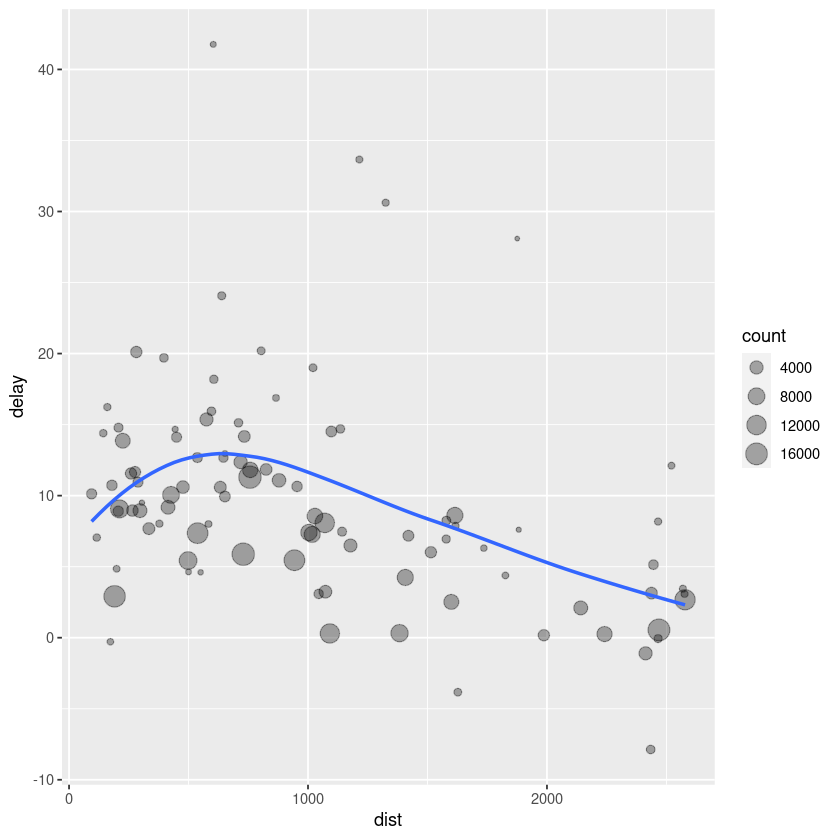

In [36]:
# it looks like delays increase with distance up to
# ~750 miles and then decrease. Maybe as flights get longer
# there's more ability to make up delays in the air
ggplot(data = delay,
       mapping = aes(x = dist, y = delay)) +
    geom_point(aes(size = count),
               alpha = 1/3) +
    geom_smooth(se = FALSE,
                method = 'loess',
                formula = 'y ~ x')

There are three steps to prepare this data:
1. Group flights by destination.
2. Summarize to compute distance, average delay, and number of flights.
3. Filter to remove noisy points and Honolulu airport, which is almost twice as far away as the next closest airport.

This code is a little frustrating to write because we have to give each
intermediate data frame a name, even though we don’t care about it.
Naming things is hard, so this slows down our analysis.
There’s another way to tackle the same problem with the pipe, %>% :

In [37]:
delays <- flights %>%
    group_by(dest) %>%
    summarize(count = n(),
              dist = mean(distance, na.rm = TRUE),
              delay = mean(arr_delay, na.rm = TRUE)) %>%
    filter(count > 20, dest != 'HNL')

Behind the scenes, `x %>% f(y)` turns into `f(x, y)` , and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` , and so on. You can use the pipe
to rewrite multiple operations in a way that you can read left-to-right, top-to-bottom.

## __Missing Values__

You may have wondered about the `na.rm` argument we used earlier.
What happens if we don’t set it?

In [38]:
flights %>%
    group_by(year, month, day) %>%
    summarize(mean = mean(dep_delay))

year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,NA
2013,1,2,NA
2013,1,3,NA
⋮,⋮,⋮,⋮
2013,12,29,NA
2013,12,30,NA
2013,12,31,NA


We get a lot of missing values! That’s because aggregation functions
obey the usual rule of missing values: if there’s any missing value in
the input, the output will be a missing value. Fortunately, all aggregation functions have an na.rm argument, which removes the miss‐
ing values prior to computation:

In [39]:
flights %>%
    group_by(year, month, day) %>%
    summarize(mean = mean(dep_delay, na.rm = TRUE))

year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,11.54893
2013,1,2,13.85882
2013,1,3,10.98783
⋮,⋮,⋮,⋮
2013,12,29,22.309551
2013,12,30,10.698113
2013,12,31,6.996053


In this case, where missing values represent cancelled flights, we
could also tackle the problem by first removing the cancelled flights.
We’ll save this dataset so we can reuse it in the next few examples:

In [40]:
not_cancelled <- flights %>%
    filter(!is.na(dep_delay), !is.na(arr_delay))

In [41]:
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(mean = mean(dep_delay))

year,month,day,mean
<int>,<int>,<int>,<dbl>
2013,1,1,11.43562
2013,1,2,13.67780
2013,1,3,10.90778
⋮,⋮,⋮,⋮
2013,12,29,22.111751
2013,12,30,10.710388
2013,12,31,6.905138


Whenever you do any aggregation, it’s always a good idea to include
either a count ( `n()` ), or a count of nonmissing values
( `sum(!is.na(x))` ). That way you can check that you’re not drawing
conclusions based on very small amounts of data. For example, let’s
look at the planes (identified by their tail number) that have the
highest average delays:

In [42]:
delays <- not_cancelled %>%
    group_by(tailnum) %>%
    summarize(delay = mean(arr_delay))

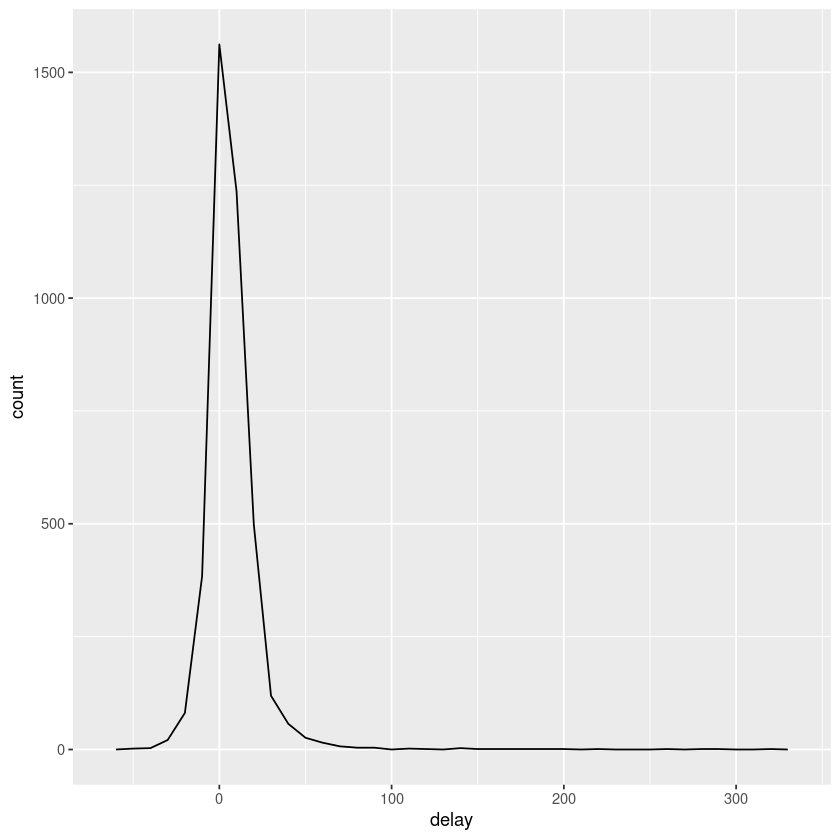

In [43]:
ggplot(data = delays, mapping = aes(x = delay)) +
    geom_freqpoly(binwidth = 10)

Wow, there are some planes that have an average delay of 5 hours
(300 minutes)!
The story is actually a little more nuanced. We can get more insight
if we draw a scatterplot of number of flights versus average delay:

In [44]:
delays <- not_cancelled %>%
    group_by(tailnum) %>%
    summarize(delay = mean(arr_delay, na.rm = TRUE),
              n = n())

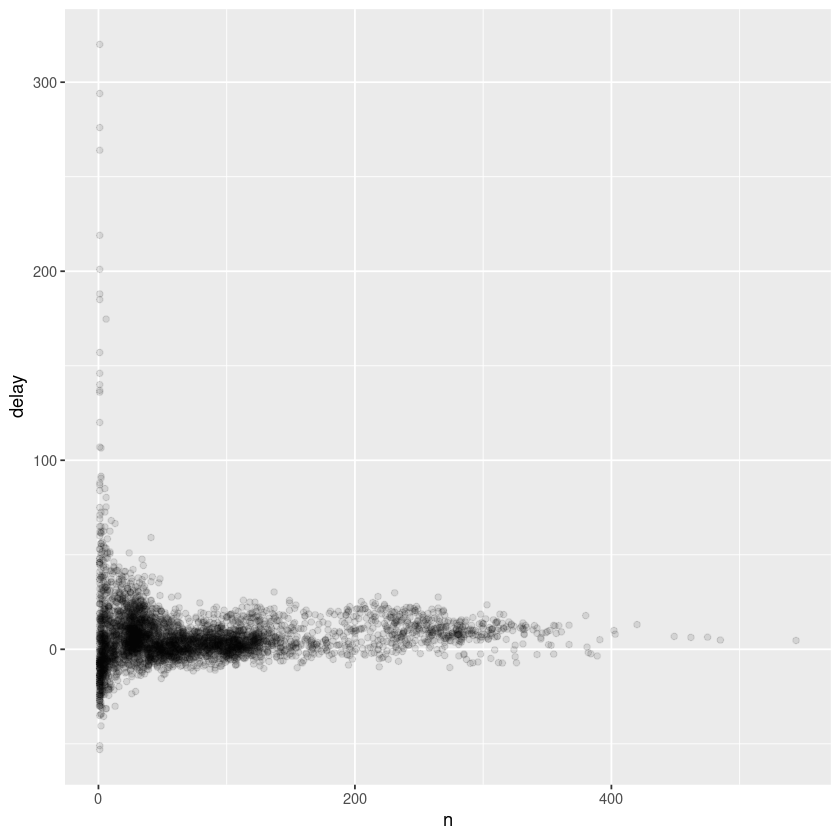

In [45]:
ggplot(data = delays, mapping = aes(x = n, y =delay)) +
    geom_point(alpha = 1/10)

Not surprisingly, there is much greater variation in the average delay
when there are few flights. The shape of this plot is very characteris‐
tic: whenever you plot a mean (or other summary) versus group
size, you’ll see that the variation decreases as the sample size increa‐
ses.

When looking at this sort of plot, it’s often useful to filter out the
groups with the smallest numbers of observations, so you can see
more of the pattern and less of the extreme variation in the smallest
groups. This is what the following code does, as well as showing you
a handy pattern for integrating ggplot2 into dplyr flows. It’s a bit
painful that you have to switch from %>% to + , but once you get the
hang of it, it’s quite convenient:

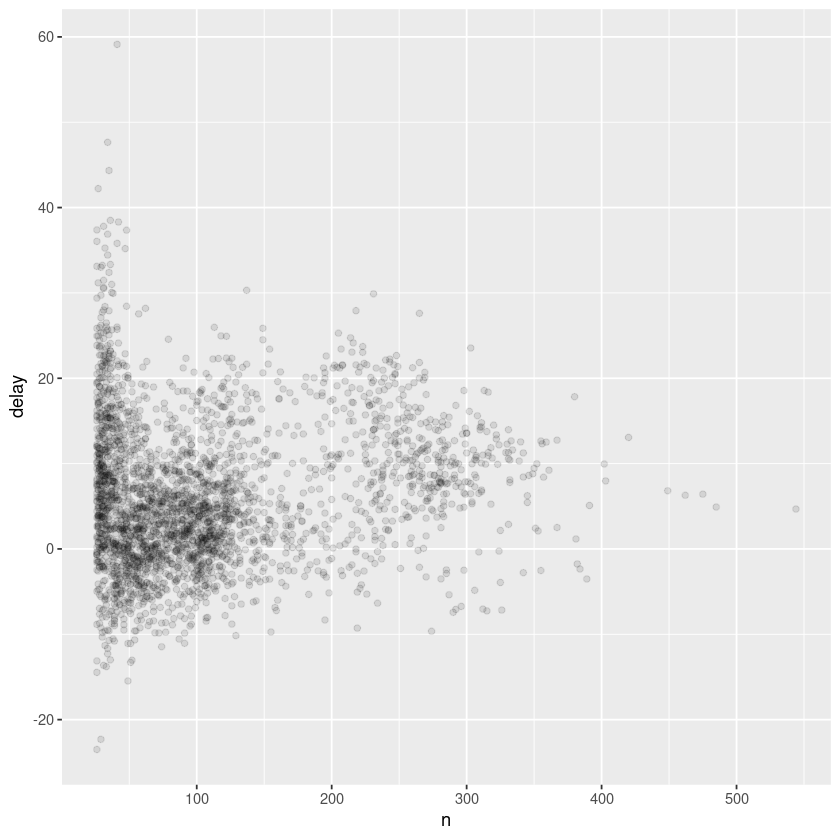

In [46]:
delays %>%
    filter(n > 25) %>%
    ggplot(mapping = aes(x = n, y = delay)) +
        geom_point(alpha = 1/10)

There’s another common variation of this type of pattern. Let’s look
at how the average performance of batters in baseball is related to
the number of times they’re at bat.

When I plot the skill of the batter (measured by the batting average,
ba ) against the number of opportunities to hit the ball (measured by
at bat, ab ), you see two patterns:
- As above, the variation in our aggregate decreases as we get
more data points.
- There’s a positive correlation between skill ( ba ) and opportuni‐
ties to hit the ball ( ab ). This is because teams control who gets to
play, and obviously they’ll pick their best players:

In [47]:
batting <- Lahman::Batting

In [48]:
batters <- batting %>%
    group_by(playerID) %>%
    summarize(ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
              ab = sum(AB, na.rm = TRUE))

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



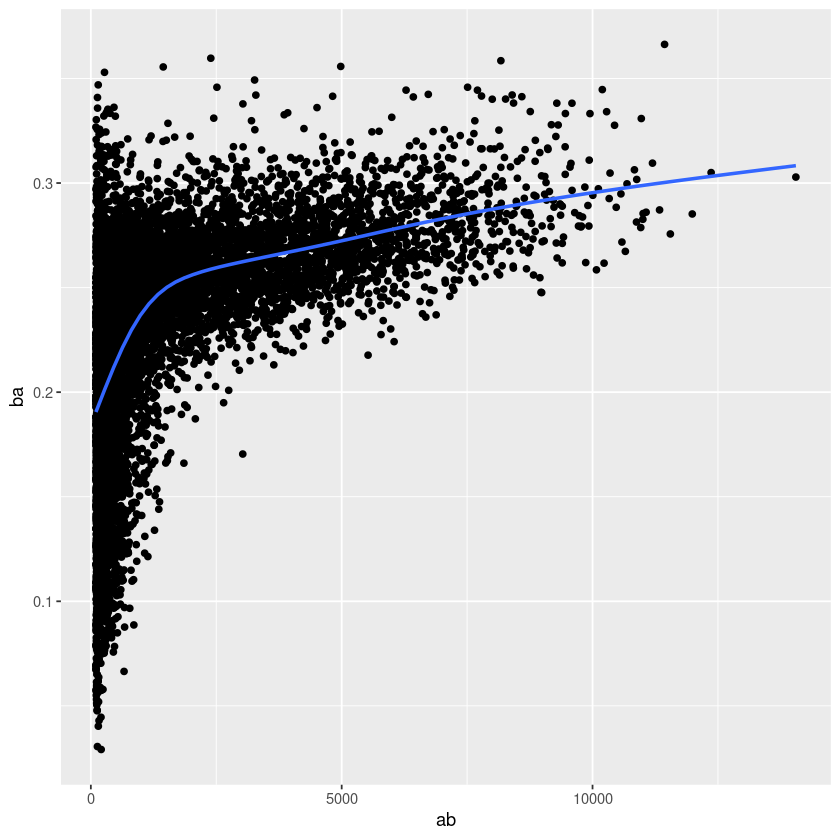

In [49]:
batters %>%
    filter(ab > 100) %>%
    ggplot(mapping = aes(x = ab, y = ba)) +
    geom_point() +
    geom_smooth(se = FALSE)

This also has important implications for ranking. If you naively sort
on desc(ba) , the people with the best batting averages are clearly
lucky, not skilled:

In [50]:
batters %>%
    arrange(desc(ba))

playerID,ba,ab
<chr>,<dbl>,<int>
abramge01,1,1
alanirj01,1,1
alberan01,1,1
⋮,⋮,⋮
zinsebi01,NaN,0
zumayjo01,NaN,0
zychto01,NaN,0


### __Useful Summary Functions__

Just using means, counts, and sum can get you a long way, but R
provides many other useful summary functions:

#### _Measures of location_

We’ve used `mean(x)` , but `median(x)` is also useful. The mean is
the sum divided by the length; the median is a value where 50%
of x is above it, and 50% is below it.

It’s sometimes useful to combine aggregation with logical subsetting.

In [51]:
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(avg_delay_1 = mean(arr_delay),
              avg_delay_2 = mean(arr_delay[arr_delay > 0]))

year,month,day,avg_delay_1,avg_delay_2
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,12.651023,32.48156
2013,1,2,12.692888,32.02991
2013,1,3,5.733333,27.66087
⋮,⋮,⋮,⋮,⋮
2013,12,29,18.763825,47.25636
2013,12,30,10.057712,31.24380
2013,12,31,6.212121,24.45596


#### _Measures of spread_ `sd(x)`, `IQR(x)`, `mad(x)`

The mean squared deviation, or standard deviation or sd for
short, is the standard measure of spread. The interquartile range
IQR() and median absolute deviation mad(x) are robust equivalents that may be more useful if you have outliers:

In [52]:
# why is distance to some destinations more variable
# than to others?
not_cancelled %>%
    group_by(dest) %>%
    summarize(distance_sd = sd(distance)) %>%
    arrange(desc(distance_sd))

dest,distance_sd
<chr>,<dbl>
EGE,10.54277
SAN,10.35009
SFO,10.21602
⋮,⋮
SNA,0
TUL,0
LEX,NA


#### _Measures of rank_ `min(x)`, `quantile(x, 0.25)`, `max(x)`

Quantiles are a generalization of the median. For example, quan
tile(x, 0.25) will find a value of x that is greater than 25% of
the values, and less than the remaining 75%:

In [54]:
# when to the first and alst flights leave each day?
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(first = min(dep_time),
              last = max(dep_time))

year,month,day,first,last
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
⋮,⋮,⋮,⋮,⋮
2013,12,29,3,2400
2013,12,30,1,2356
2013,12,31,13,2356


#### _Measures of position_ `min(x)`, `quantile(x, 0.25)`, `max(x)`

These work similarly to `x[1]` , `x[2]` , and `x[length(x)]` but let
you set a default value if that position does not exist (i.e., you’re
trying to get the third element from a group that only has two
elements). For example, we can find the first and last departure
for each day:

In [58]:
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(first_dep = first(dep_time),
              last_dep = last(dep_time))

year,month,day,first_dep,last_dep
<int>,<int>,<int>,<int>,<int>
2013,1,1,517,2356
2013,1,2,42,2354
2013,1,3,32,2349
⋮,⋮,⋮,⋮,⋮
2013,12,29,3,2400
2013,12,30,1,2356
2013,12,31,13,2356


These functions are complementary to filtering on ranks. Filtering gives you all variables, with each observation in a separate
row:

In [59]:
not_cancelled %>%
    group_by(year, month, day) %>%
    mutate(r = min_rank(desc(dep_time))) %>%
    filter(r %in% range(r))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,r
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,831
2013,1,1,2356,2359,-3,425,437,-12,B6,727,N588JB,JFK,BQN,186,1576,23,59,2013-01-01 23:00:00,1
2013,1,2,42,2359,43,518,442,36,B6,707,N580JB,JFK,SJU,189,1598,23,59,2013-01-02 23:00:00,928
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,29,2356,2359,-3,341,350,-9,B6,745,N613JB,JFK,PSE,204,1617,23,59,2013-09-29 23:00:00,1
2013,9,30,453,500,-7,621,648,-27,US,1877,N186US,EWR,CLT,76,529,5,0,2013-09-30 05:00:00,986
2013,9,30,2349,2359,-10,325,350,-25,B6,745,N516JB,JFK,PSE,196,1617,23,59,2013-09-30 23:00:00,1


#### _Counts_

You’ve seen `n()` , which takes no arguments, and returns the size
of the current group. To count the number of non-missing val‐
ues, use `sum(!is.na(x))` . To count the number of distinct
(unique) values, use `n_distinct(x)` :

In [61]:
# which destinations have the most carriers?
not_cancelled %>%
    group_by(dest) %>%
    summarize(carriers = n_distinct(carrier)) %>%
    arrange(desc(carriers))

dest,carriers
<chr>,<int>
ATL,7
BOS,7
CLT,7
⋮,⋮
SMF,1
SNA,1
TUL,1


Counts are so useful that dplyr provides a simple helper if all
you want is a count:

In [62]:
not_cancelled %>%
    count(dest)

dest,n
<chr>,<int>
ABQ,254
ACK,264
ALB,418
⋮,⋮
TVC,95
TYS,578
XNA,992


You can optionally provide a weight variable. For example, you
could use this to “count” (sum) the total number of miles a
plane flew:

In [63]:
not_cancelled %>%
    count(tailnum, wt = distance)

tailnum,n
<chr>,<dbl>
D942DN,3418
N0EGMQ,239143
N10156,109664
⋮,⋮
N998DL,64956
N999DN,54623
N9EAMQ,160862


#### _Counts and proportions of logical values_ `sum(x > 10)` , `mean(y == 0)`

When used with numeric functions, `TRUE` is converted to `1` and
`FALSE` to `0`. This makes `sum()` and `mean()` very useful: `sum(x)`
gives the number of `TRUE`s and `mean(x)` gives the proportion:

In [66]:
# how many flights left before 5am?
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(n_early = sum(dep_time < 500))

year,month,day,n_early
<int>,<int>,<int>,<int>
2013,1,1,0
2013,1,2,3
2013,1,3,4
⋮,⋮,⋮,⋮
2013,12,29,3
2013,12,30,6
2013,12,31,4


In [71]:
# what proportion of flights are delayed by
# more than an hours?
not_cancelled %>%
    group_by(year, month, day) %>%
    summarize(hour_perc = mean(arr_delay > 60))

year,month,day,hour_perc
<int>,<int>,<int>,<dbl>
2013,1,1,0.07220217
2013,1,2,0.08512931
2013,1,3,0.05666667
⋮,⋮,⋮,⋮
2013,12,29,0.14861751
2013,12,30,0.07240294
2013,12,31,0.04347826


### __Grouping by Multiple Variables__

When you group by multiple variables, each summary peels off one
level of the grouping. That makes it easy to progressively roll up a
dataset

In [72]:
daily <- flights %>%
    group_by(year, month, day)

(per_day <- daily %>%
    summarize(flights = n()))

year,month,day,flights
<int>,<int>,<int>,<int>
2013,1,1,842
2013,1,2,943
2013,1,3,914
⋮,⋮,⋮,⋮
2013,12,29,888
2013,12,30,968
2013,12,31,776


In [73]:
(per_month <- per_day %>%
    summarize(flights = sum(flights)))

year,month,flights
<int>,<int>,<int>
2013,1,27004
2013,2,24951
2013,3,28834
⋮,⋮,⋮
2013,10,28889
2013,11,27268
2013,12,28135


In [74]:
(per_year <- per_month %>%
    summarize(flights = sum(flights)))

year,flights
<int>,<int>
2013,336776


Be careful when progressively rolling up summaries: it’s OK for
sums and counts, but you need to think about weighting means and
variances, and it’s not possible to do it exactly for rank-based statistics like the median. In other words, the sum of groupwise sums is
the overall sum, but the median of groupwise medians is not the
overall median

### __Ungrouping__

If you need to remove grouping, and return to operations on
ungrouped data, use `ungroup()` :

In [76]:
daily %>%
    ungroup() %>%
    summarize(flights = n())

flights
<int>
336776


In [77]:
# Which carrier has the worst delays? Challenge: can you disen‐
# tangle the effects of bad airports versus bad carriers? Why/why
# not?
flights %>%
  group_by(carrier) %>%
  summarise(arr_delay = mean(arr_delay, na.rm = TRUE)) %>%
  arrange(desc(arr_delay))

carrier,arr_delay
<chr>,<dbl>
F9,21.92070
FL,20.11591
EV,15.79643
⋮,⋮
AA,0.3642909
HA,-6.9152047
AS,-9.9308886


### __Grouped Mutates (and Filters)__

Grouping is most useful in conjunction with `summarize()` , but you
can also do convenient operations with `mutate()` and `filter()` :

In [78]:
# find the worst members of each group
flights_sml %>%
    group_by(year, month, day) %>%
    filter(rank(desc(arr_delay)) < 10)

year,month,day,dep_delay,arr_delay,distance,air_time
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
2013,1,1,853,851,184,41
2013,1,1,290,338,1134,213
2013,1,1,260,263,266,46
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,158,136,746,91
2013,9,30,194,194,301,50
2013,9,30,154,130,944,123


In [81]:
# find all groups bigger than a threshold
popular_dests <- flights %>%
    group_by(dest) %>%
    filter(n() > 365)

(popular_dests)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,NA,1210,NA,NA,1330,NA,MQ,3461,N535MQ,LGA,BNA,NA,764,12,10,2013-09-30 12:00:00
2013,9,30,NA,1159,NA,NA,1344,NA,MQ,3572,N511MQ,LGA,CLE,NA,419,11,59,2013-09-30 11:00:00
2013,9,30,NA,840,NA,NA,1020,NA,MQ,3531,N839MQ,LGA,RDU,NA,431,8,40,2013-09-30 08:00:00


In [82]:
# standardize to compute per group metrics
popular_dests %>%
    filter(arr_delay > 0) %>%
    mutate(prop_delay = arr_delay / sum(arr_delay)) %>%
    select(year:day, dest, arr_delay, prop_delay)

year,month,day,dest,arr_delay,prop_delay
<int>,<int>,<int>,<chr>,<dbl>,<dbl>
2013,1,1,IAH,11,0.0001106740
2013,1,1,IAH,20,0.0002012255
2013,1,1,MIA,33,0.0002350026
⋮,⋮,⋮,⋮,⋮,⋮
2013,9,30,SFO,42,0.0002044731
2013,9,30,MCO,130,0.0006307036
2013,9,30,BOS,1,0.0000052579


A grouped filter is a grouped mutate follwoed by an ungrouped
filter.
Functions that work most naturally in grouped mutates and filters
are known as window functions (versus the summary functions
used for summaries)

In [84]:
vignette('window-functions')